# 🗺️ Lectura e Interpretación de Retratos de Fase

## 🎯 Objetivo

Comprender el **planteamiento conceptual** y la **lectura gráfica** de los retratos de fase, que son la herramienta visual fundamental para el **análisis cualitativo** de la estabilidad de un sistema dinámico (lineal o no lineal).

## 📝 Fundamentos

Un **Retrato de Fase** es una representación gráfica de las soluciones de un sistema autónomo de dos EDOs de primer orden (Sistema $\mathbf{X'} = \mathbf{A}\mathbf{X}$) en el plano $\mathbf{x_1 x_2}$.

* **Ejes:** Los ejes representan las variables de estado del sistema (ej. posición y velocidad, o dos poblaciones).
* **Trayectorias:** Las curvas en el plano son las soluciones $\mathbf{X}(t)$. Las flechas indican cómo evoluciona el sistema con el paso del tiempo ($t \to \infty$).

La característica más importante es el **Punto de Equilibrio** o **Punto Crítico**, que ocurre cuando el sistema está estático, es decir, $\mathbf{X'} = \mathbf{0}$.

---

## 💡 Ejemplo: Sistema Lineal Homogéneo

Consideraremos el sistema lineal homogéneo:
$$
\begin{cases} \mathbf{x'_1 = -2x_1 + x_2} \\ \mathbf{x'_2 = x_1 - 2x_2} \end{cases}
$$
Este sistema tiene un único punto de equilibrio en el origen: $(\mathbf{x_1, x_2}) = (\mathbf{0, 0})$.

In [1]:
# Importación de librerías necesarias para la representación conceptual
import sympy as sp
from sympy import symbols, Matrix

# Definición de la variable independiente (tiempo)
t = symbols('t')

# Definición de las variables de estado
x1, x2 = symbols('x1 x2')
X = Matrix([[x1], [x2]])

# Matriz de Coeficientes A del sistema X' = A * X
A = Matrix([[-2, 1], [1, -2]])

print("Matriz del Sistema A:")
print(A)

Matriz del Sistema A:
Matrix([[-2, 1], [1, -2]])


## ⚖️ Clasificación de Puntos Críticos (Estabilidad)

La lectura del retrato de fase se basa en la clasificación del punto crítico, la cual está determinada por los **autovalores** ($\lambda_1, \lambda_2$) de la matriz $\mathbf{A}$.



La clasificación más común, fundamental para el curso, incluye:

| Tipo de Punto Crítico | Estabilidad | Interpretación de las Trayectorias |
| :--- | :--- | :--- |
| **Nodo Estable** | Asintóticamente Estable | Todas las trayectorias se **dirigen al punto** de equilibrio $(\mathbf{0, 0})$ a medida que $t \to \infty$. |
| **Nodo Inestable** | Inestable | Todas las trayectorias se **alejan del punto** de equilibrio $(\mathbf{0, 0})$ a medida que $t \to \infty$. |
| **Punto Silla (Saddle)** | Inestable | Las trayectorias se acercan por una dirección (autovector) y se **alejan rápidamente** por la otra. |
| **Espiral Estable** | Asintóticamente Estable | Las trayectorias giran alrededor del punto mientras se **acercan gradualmente** a él. Típico de sistemas amortiguados. |
| **Espiral Inestable** | Inestable | Las trayectorias giran alrededor del punto mientras se **alejan de forma exponencial**. |

## Paso 3: Interpretación del Ejemplo

Para nuestro sistema: $\mathbf{A} = \begin{pmatrix} -2 & 1 \\ 1 & -2 \end{pmatrix}$

Los autovalores de esta matriz son:
* $\lambda_1 = -1$
* $\lambda_2 = -3$

### Lectura del Retrato de Fase (Basada en Autovalores)

1.  **Reales:** Los autovalores son reales y distintos. $\rightarrow$ **Nodo** (No es Espiral).
2.  **Signo Negativo:** Ambos autovalores son negativos ($\lambda < 0$). $\rightarrow$ **Estable** (Las soluciones decaen a cero).

**Conclusión:** El punto de equilibrio $(\mathbf{0, 0})$ es un **Nodo Asintóticamente Estable**.

### Significado Físico

* Si las variables $\mathbf{x_1}$ y $\mathbf{x_2}$ representan la posición y velocidad de un sistema, este resultado significa que, **sin importar las condiciones iniciales**, la posición y la velocidad del sistema **siempre tenderán a cero** a largo plazo (el sistema regresa al reposo y equilibrio), lo que es característico de un sistema sobre-amortiguado.

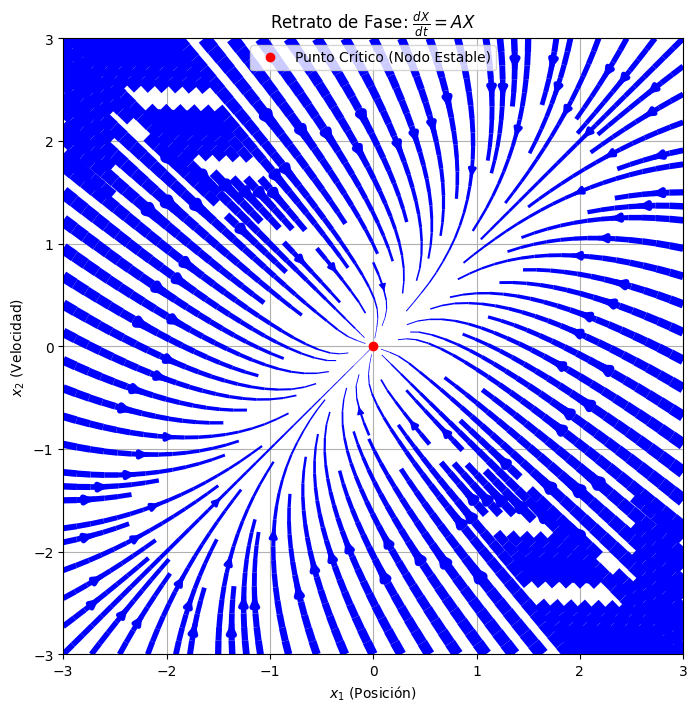

In [3]:
# Importación de librerías para la visualización
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definición del Rango y la Malla ---
# Creamos un rango de valores para x1 y x2
rango = 3.0
x_limit = np.linspace(-rango, rango, 20)
y_limit = np.linspace(-rango, rango, 20)

# Creamos la malla de puntos (grid)
X, Y = np.meshgrid(x_limit, y_limit)

# --- 2. Definición de las EDO del Sistema (Campos Vectoriales) ---
# Sistema: x1' = -2*x1 + x2  (U)
#          x2' = x1 - 2*x2   (V)
U = -2 * X + Y
V = X - 2 * Y

# --- 3. Normalización de las Flechas (Opcional, pero mejora la visualización) ---
# Calculamos la magnitud de los vectores para que todas las flechas tengan el mismo tamaño
# y el color represente la velocidad o magnitud.
N = np.sqrt(U**2 + V**2)
U = U / N
V = V / N

# --- 4. Generación del Gráfico ---
plt.figure(figsize=(8, 8))
# Dibuja el retrato de fase usando streamplot (flujo de campo)
plt.streamplot(X, Y, U, V, density=1.5, linewidth=N, color='blue', cmap='cool')

# Dibuja el punto crítico (0, 0)
plt.plot(0, 0, 'ro', label='Punto Crítico (Nodo Estable)')

# Configuración y Títulos
plt.xlabel('$x_1$ (Posición)')
plt.ylabel('$x_2$ (Velocidad)')
plt.title('Retrato de Fase: $\\frac{dX}{dt} = AX$')
plt.grid(True)
plt.legend()
plt.show()

## 🌟 Conclusión y Análisis Cualitativo

La visualización confirma el análisis analítico:

* **Punto de Equilibrio:** El punto en el origen (0, 0) es un **Nodo Asintóticamente Estable**.
* **Comportamiento:** Las líneas de flujo (trayectorias) se dirigen directamente hacia el origen. El sistema es **estable** y **decae** (se detiene) a largo plazo, independientemente de la posición o velocidad inicial.

La combinación del análisis de **Autovalores** y la **Visualización del Retrato de Fase** es el método más completo para entender el comportamiento de los sistemas dinámicos.